<a href="https://colab.research.google.com/github/komal-sharma19/CodeClause_Projects/blob/main/Crop_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
dataset_path = '/content/drive/MyDrive/PlantVillage_Dataset'


In [ ]:
!pip install tensorflow matplotlib numpy


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/PlantVillage_Dataset/PlantVillage.zip'  # update with your exact path
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/PlantVillage_Dataset')


In [ ]:
import os

base_dir = '/content/drive/MyDrive/PlantVillage_Dataset/PlantVillage'  # yahan 'PlantVillage' dataset folder hona chahiye

print(os.listdir(base_dir))


['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'PlantVillage', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
img_height, img_width = 128, 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 33026 images belonging to 16 classes.
Found 8249 images belonging to 16 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,704 (12.61 MB)

 Trainable params: 3,306,704 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
##  Model training start karo
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.4958 - loss: 1.8672

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1033/1033 ━━━━━━━━━━━━━━━━━━━━ 337s 321ms/step - accuracy: 0.4958 - loss: 1.8670 - val_accuracy: 0.3253 - val_loss: 1.5523
Epoch 2/30
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 315s 305ms/step - accuracy: 0.5104 - loss: 1.3325 - val_accuracy: 0.2581 - val_loss: 1.6790
Epoch 3/30
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 315s 305ms/step - accuracy: 0.5327 - loss: 1.1822 - val_accuracy: 0.2451 - val_loss: 1.8987
Epoch 4/30
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 320s 310ms/step - accuracy: 0.5315 - loss: 1.1281 - val_accuracy: 0.2024 - val_loss: 1.8738
Epoch 5/30
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 345s 332ms/step - accuracy: 0.5397 - loss: 1.0888 - val_accuracy: 0.1867 - val_loss: 2.2374
Epoch 6/30
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 320s 310ms/step - accuracy: 0.5436 - loss: 1.0547 - val_accuracy: 0.2097 - val_loss: 1.9758
Epoch 7/30
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 325s 314ms/step - accuracy: 0.5439 - loss: 1.0280 - val_accuracy: 0.1588 - val_loss: 2.2049
Epoch 8/30
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 320s 310ms/step - accuracy: 0.5

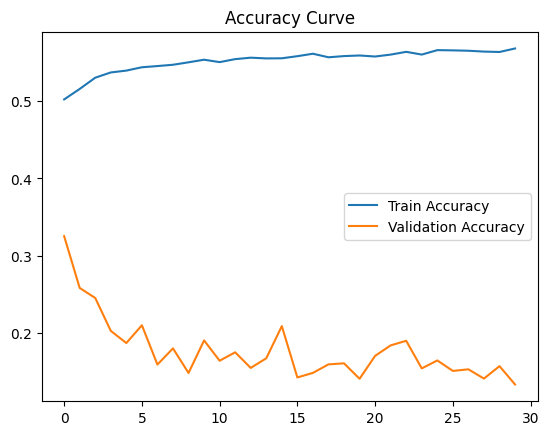

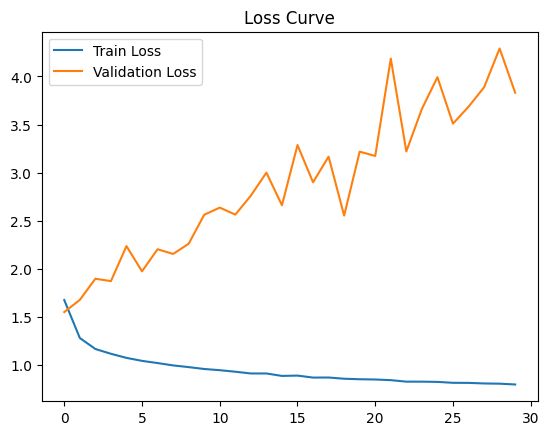

In [15]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()




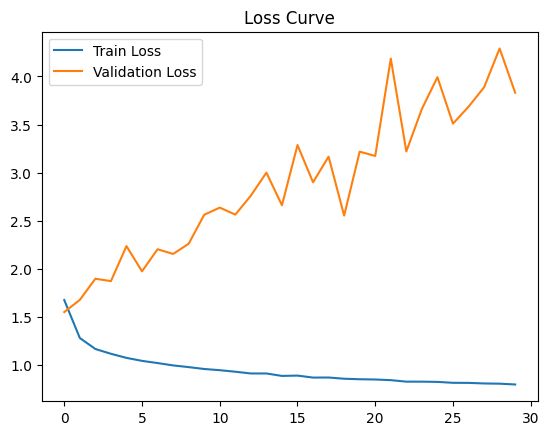

In [16]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

In [17]:
model.save('/content/drive/MyDrive/PlantVillage_Dataset/final_crop_disease_model.h5')


In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/drive/MyDrive/PlantVillage_Dataset/00c07a77-15e6-4815-92d4-8d1e1afb7f3c___PSU_CG 2052.JPG'  # replace with your image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = np.argmax(pred[0])

print(f"Predicted Class: {list(train_generator.class_indices.keys())[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Class: PlantVillage
